In [2]:
import requests
from lxml import etree, html
from sklearn.preprocessing import scale
import xml.etree.ElementTree as elemTree
import json, pandas as pd
import pandasql as ps
import numpy as np
import os
import seaborn as sns
import sys
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
from plotnine import *
# postgreDB 연동
import psycopg2
import matplotlib.pyplot as plt
import sqlalchemy  # Package for accessing SQL databases via Python

# Connect to database (Note: The package psychopg2 is required for Postgres to work with SQLAlchemy)
engine = sqlalchemy.create_engine("postgresql://analytics:analytics!@#@localhost:5432/postgres")
con = engine.connect()

conn_string = "host='localhost' dbname ='postgres' user='analytics' password='analytics!@#'"
conn = psycopg2.connect(conn_string)
cur = conn.cursor()
# 메모리 초기화
sys.stdout.flush()
%matplotlib inline

# 공공데이터포털(생활기상지수)

대기환경물질 기초 분석

## Contents

In [ ]:
# pre = pd.read_csv('/Users/HIT/Downloads/2016/201604.csv', encoding='euc-kr')
# pre = pd.read_excel('/Users/HIT/Downloads/2017/2017년 4분기.xlsx', encoding='euc-kr')
pre = pd.read_excel('/Users/HIT/Downloads/2018/201804.xlsx', encoding='euc-kr')
print(pre.shape)
pre.head()

In [ ]:
list(pre['지역'].unique())

In [ ]:
sql = '''
select * 
from pre
where 지역 in
('서울 중구','서울 용산구 '
,'서울 종로구 ','서울 광진구 '
,'서울 성동구 ','서울 중랑구 ','서울 동대문구','서울 성북구 '
,'서울 도봉구 ','서울 은평구 ','서울 서대문구'
,'서울 마포구 ','서울 강서구 '
,'서울 구로구 ','서울 영등포구','서울 동작구 ','서울 관악구 ','서울 강남구 '
,'서울 서초구 ','서울 송파구 ','서울 강동구 '
,'서울 금천구 ','서울 강북구 ','서울 양천구 ','서울 노원구 ','경기 수원시','경기 성남시'
,'경기 의정부시','경기 안양시','경기 광명시'
,'경기 안산시','경기 과천시','경기 구리시'
,'경기 의왕시','경기 시흥시','경기 남양주시'
,'경기 평택시','경기 파주시','경기 고양시','경기 광주시'
,'경기 용인시','경기 이천시','경기 포천시'
,'경기 김포시','경기 군포시','경기 오산시'
,'경기 하남시','경기 화성시','경기 양주시'
,'경기 동두천시','경기 안성시'
,'경기 여주시','경기 연천군'
,'경기 가평군','경기 양평군'
,'인천 중구','인천 동구','인천 남동구'
,'인천 남구','인천 부평구'
,'인천 서구','인천 계양구','인천 강화군'
,'인천 연수구','경기 부천시','인천 옹진군', '서울'
)
'''

out = ps.sqldf(sql)

In [ ]:
out['지역'].unique()

In [ ]:
print(out.shape)
out.head()

In [ ]:
# out.to_csv('/Users/HIT/미세먼지/201604.csv', encoding='utf-8')
# out.to_csv('/Users/HIT/미세먼지/201704.csv', encoding='utf-8')
out.to_csv('/Users/HIT/미세먼지/201804.csv', encoding='utf-8')

In [ ]:
# postgreDB 연동
import psycopg2

conn_string = "host='localhost' dbname ='postgres' user='analytics' password='analytics!@#'"
conn = psycopg2.connect(conn_string)
cur = conn.cursor()

In [ ]:
pgsql = "select pvn_nm, bor_nm from public.sales_data group by pvn_nm, bor_nm order by 1, 2"

# CREATE, ALTER, INSERT, UPDATE, DELETE 등
# cur.execute()
# conn.commit()

In [ ]:
cur.execute(pgsql)
result = cur.fetchall()
result

### 2016년 데이터 셋

In [3]:
files = os.listdir('/Users/HIT/미세먼지')
default_path = '/Users/HIT/미세먼지/'

year_2_1 = pd.read_csv(default_path+files[0], engine='python', encoding='utf-8')
year_2_2 = pd.read_csv(default_path+files[1], engine='python', encoding='utf-8')
year_2_3 = pd.read_csv(default_path+files[2], engine='python', encoding='utf-8')
year_2_4 = pd.read_csv(default_path+files[3], engine='python', encoding='utf-8')
print('1 / Quater', year_2_1.shape)
print('2 / Quater', year_2_2.shape)
print('3 / Quater', year_2_3.shape)
print('4 / Quater', year_2_4.shape)
year_2_1.head()

1 / Quater (307944, 12)
2 / Quater (307944, 12)
3 / Quater (311328, 12)
4 / Quater (313536, 12)


,Unnamed: 0,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,0,경기 가평군,131611,가평읍,2016010101,0.004,0.7,0.007,0.014,70.0,NaN,경기 가평군 가평읍 석봉로 181
1,1,경기 가평군,131611,가평읍,2016010102,0.004,0.7,0.007,0.012,70.0,NaN,경기 가평군 가평읍 석봉로 181
2,2,경기 가평군,131611,가평읍,2016010103,0.004,0.7,0.007,0.011,73.0,NaN,경기 가평군 가평읍 석봉로 181
3,3,경기 가평군,131611,가평읍,2016010104,0.004,0.7,0.007,0.011,68.0,NaN,경기 가평군 가평읍 석봉로 181
4,4,경기 가평군,131611,가평읍,2016010105,0.004,0.7,0.006,0.013,75.0,NaN,경기 가평군 가평읍 석봉로 181


In [4]:
files[0:4]

['201601.csv', '201602.csv', '201603.csv', '201604.csv']

In [5]:
merge_2016 = pd.concat([year_2_1, year_2_2, year_2_3, year_2_4])
# 건수 검증
print(merge_2016.shape[0] == (year_2_1.shape[0] + year_2_2.shape[0] + year_2_3.shape[0] + year_2_4.shape[0]))
print(merge_2016.shape)
merge_2016 = merge_2016.iloc[:,1:]
merge_2016.head()

True
(1240752, 12)


,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,경기 가평군,131611,가평읍,2016010101,0.004,0.7,0.007,0.014,70.0,NaN,경기 가평군 가평읍 석봉로 181
1,경기 가평군,131611,가평읍,2016010102,0.004,0.7,0.007,0.012,70.0,NaN,경기 가평군 가평읍 석봉로 181
2,경기 가평군,131611,가평읍,2016010103,0.004,0.7,0.007,0.011,73.0,NaN,경기 가평군 가평읍 석봉로 181
3,경기 가평군,131611,가평읍,2016010104,0.004,0.7,0.007,0.011,68.0,NaN,경기 가평군 가평읍 석봉로 181
4,경기 가평군,131611,가평읍,2016010105,0.004,0.7,0.006,0.013,75.0,NaN,경기 가평군 가평읍 석봉로 181


In [6]:
list(merge_2016['지역'].unique())

['경기 가평군',
 '경기 고양시',
 '경기 과천시',
 '경기 광명시',
 '경기 광주시',
 '경기 구리시',
 '경기 군포시',
 '경기 김포시',
 '경기 남양주시',
 '경기 동두천시',
 '경기 부천시',
 '경기 성남시',
 '경기 수원시',
 '경기 시흥시',
 '경기 안산시',
 '경기 안성시',
 '경기 안양시',
 '경기 양주시',
 '경기 양평군',
 '경기 여주시',
 '경기 연천군',
 '경기 오산시',
 '경기 용인시',
 '경기 의왕시',
 '경기 의정부시',
 '경기 이천시',
 '경기 파주시',
 '경기 평택시',
 '경기 포천시',
 '경기 하남시',
 '경기 화성시',
 '서울',
 '인천 강화군',
 '인천 계양구',
 '인천 남구',
 '인천 남동구',
 '인천 동구',
 '인천 부평구',
 '인천 서구',
 '인천 연수구',
 '인천 옹진군',
 '인천 중구']

In [13]:
merge_2016_sql = """
select 지역 || ' ' || 측정소명 as local_nm
     , substr(측정일시,1,8) as std_date
     , avg(SO2)  as SO2
     , avg(CO)   as CO
     , avg(O3)   as O3
     , avg(NO2)  as N02
     , avg(PM10) as PM10
     , avg(PM25) as PM25
  from merge_2016
  where 지역 = '서울'
    and 측정소명 = '구로구'
group by 
       지역 || ' ' || 측정소명
     , substr(측정일시,1,8)
  
"""
grouping_2016 = ps.sqldf(merge_2016_sql)
print(grouping_2016.shape)
grouping_2016.head()

(366, 8)


,local_nm,std_date,SO2,CO,O3,N02,PM10,PM25
0,서울 구로구,20160101,0.006625,1.091667,0.007208,0.037875,56.083333,40.791667
1,서울 구로구,20160102,0.006208,0.687500,0.011917,0.032500,40.583333,27.375000
2,서울 구로구,20160103,0.008292,0.895833,0.016792,0.036542,83.000000,50.500000
3,서울 구로구,20160104,0.006625,0.700000,0.024708,0.020708,77.333333,42.083333
4,서울 구로구,20160105,0.006417,0.533333,0.014667,0.022958,30.500000,15.750000


In [20]:
grouping_2016[grouping_2016['std_date'] >= '20160624']

,local_nm,std_date,SO2,CO,O3,N02,PM10,PM25
175,서울 구로구,20160624,NaN,NaN,NaN,NaN,NaN,NaN
176,서울 구로구,20160625,NaN,NaN,NaN,NaN,NaN,NaN
177,서울 구로구,20160626,NaN,NaN,NaN,NaN,NaN,NaN
178,서울 구로구,20160627,NaN,NaN,NaN,NaN,NaN,NaN
179,서울 구로구,20160628,NaN,NaN,NaN,NaN,NaN,NaN
180,서울 구로구,20160629,NaN,NaN,NaN,NaN,NaN,NaN
181,서울 구로구,20160630,NaN,NaN,NaN,NaN,NaN,NaN
182,서울 구로구,20160701,NaN,NaN,NaN,NaN,NaN,NaN
183,서울 구로구,20160702,NaN,NaN,NaN,NaN,NaN,NaN
184,서울 구로구,20160703,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
grouping_2016.to_csv('/Users/HIT/Desktop/pm10.csv')

## 2017년 데이터셋

In [ ]:
year_3_1 = pd.read_csv(default_path+files[4], engine='python', encoding='utf-8')
year_3_2 = pd.read_csv(default_path+files[5], engine='python', encoding='utf-8')
year_3_3 = pd.read_csv(default_path+files[6], engine='python', encoding='utf-8')
year_3_4 = pd.read_csv(default_path+files[7], engine='python', encoding='utf-8')
print('1 / Quater', year_3_1.shape)
print('2 / Quater', year_3_2.shape)
print('3 / Quater', year_3_3.shape)
print('4 / Quater', year_3_4.shape)
year_3_1.head()

In [ ]:
files[4:8]

In [ ]:
merge_2017 = pd.concat([year_3_1, year_3_2, year_3_3, year_3_4])
# 건수 검증
print(merge_2017.shape[0] == (year_3_1.shape[0] + year_3_2.shape[0] + year_3_3.shape[0] + year_3_4.shape[0]))
print(merge_2017.shape)
merge_2017 = merge_2017.iloc[:,1:]
merge_2017.head()

In [ ]:
# bor_val = []
# for i in range(len(result)) :
#     bor_val.append(result[i][0] +' ' + result[i][1])
# bor_val
list(merge_2017['지역'].unique())

In [ ]:
merge_2017_sql = """
select 지역
     , 측정소코드
     , 측정소명
     , substr(측정일시,1,8) as 측정일자
     , 주소
     , avg(SO2)  as SO2
     , avg(CO)   as CO
     , avg(O3)   as O3
     , avg(NO2)  as N02
     , avg(PM10) as PM10
     , avg(PM25) as PM25
  from merge_2017
group by 
       지역
     , 측정소코드
     , 측정소명
     , substr(측정일시,1,8)
     , 주소
  
"""
grouping_2017 = ps.sqldf(merge_2017_sql)
print(grouping_2017.shape)
grouping_2017.head()

## 2018년 데이터셋

In [ ]:
year_4_1 = pd.read_csv(default_path+files[8], engine='python', encoding='utf-8')
year_4_2 = pd.read_csv(default_path+files[9], engine='python', encoding='utf-8')
year_4_3 = pd.read_csv(default_path+files[10], engine='python', encoding='utf-8')
year_4_4 = pd.read_csv(default_path+files[11], engine='python', encoding='utf-8')
print('1 / Quater', year_4_1.shape)
print('2 / Quater', year_4_2.shape)
print('3 / Quater', year_4_3.shape)
print('4 / Quater', year_4_4.shape)
year_4_1.head()

In [ ]:
# escape 문자 제거
year_4_1['지역'] = year_4_1['지역'].replace('인천 서구\n\n',"인천 서구").replace('인천 연수구\n\n', '인천 연수구')
year_4_2['지역'] = year_4_2['지역'].replace('인천 서구\n\n',"인천 서구").replace('인천 연수구\n\n', '인천 연수구')
year_4_3['지역'] = year_4_3['지역'].replace('인천 서구\n\n',"인천 서구").replace('인천 연수구\n\n', '인천 연수구')
year_4_4['지역'] = year_4_4['지역'].replace('인천 서구\n\n',"인천 서구").replace('인천 연수구\n\n', '인천 연수구')

In [ ]:
# 병합 (2018년 3분기부터 스키마 변경, 필요없는 망(도시대기) 제거)
year_4_3.head()
year_4_4.head()
columns_34 =  ['Unnamed: 0', '지역', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3',
               'NO2', 'PM10', 'PM25', '주소']
year_4_3 = year_4_3[columns_34]
year_4_4 = year_4_4[columns_34]
merge_2018 = pd.concat([year_4_1, year_4_2, year_4_3, year_4_4])
merge_2018['지역'].unique()

In [ ]:
files[8:12]

In [ ]:
# 건수 검증
print(merge_2018.shape[0] == (year_4_1.shape[0] + year_4_2.shape[0] + year_4_3.shape[0] + year_4_4.shape[0]))
print(merge_2018.shape)
merge_2018.head()

In [ ]:
# bor_val = []
# for i in range(len(result)) :
#     bor_val.append(result[i][0] +' ' + result[i][1])
# bor_val
list(merge_2018['지역'].unique())

In [ ]:
merge_2018_sql = """
select 지역
     , 측정소코드
     , 측정소명
     , substr(측정일시,1,8) as 측정일자
     , 주소
     , avg(SO2)  as SO2
     , avg(CO)   as CO
     , avg(O3)   as O3
     , avg(NO2)  as N02
     , avg(PM10) as PM10
     , avg(PM25) as PM25
  from merge_2018
group by 
       지역
     , 측정소코드
     , 측정소명
     , substr(측정일시,1,8)
     , 주소
  
"""
grouping_2018 = ps.sqldf(merge_2018_sql)
print(grouping_2018.shape)
grouping_2018.head()

## 3개년 미세먼지 병합

In [ ]:
print(grouping_2016.shape, grouping_2017.shape, grouping_2018.shape)

In [ ]:
## 병합(2016, 2017, 2018)

pm = pd.concat([grouping_2016, grouping_2017,  grouping_2018])
print(pm.shape)
pm.head()

## 컬럼명 변경

In [ ]:
col = ['bor_nm', 'obs_cd', 'obs_nm', 'obs_date', 'adres', 'SO2', 'CO', 'O3', 'N02', 'PM10', 'PM25']
pm.columns = col
pm.head()

## bor_nm, pvn_nm 생성

In [ ]:
# 현재는 사용 안함 sql로 대체

# pm['pvn_nm'] = pm.bor_nm.apply(lambda e : e.split()[1])
# pm['bor'] = pm.bor_nm.apply(lambda e : e.split()[0])
# pm.head()

## DDL

In [ ]:
# postgreDB 연동
import psycopg2

conn_string = "host='localhost' dbname ='postgres' user='analytics' password='analytics!@#'"
conn = psycopg2.connect(conn_string)
cur = conn.cursor()

In [ ]:
# table_ddl = """
# -- 없으면 drop 문 주석 처리 있으면 그냥 수행
# drop table contest.weather_pm;
# create table contest.weather_pm (
#      bor_nm varchar null
#    , obs_cd varchar null
#    , obs_nm varchar null
#    , obs_date varchar null
#    , adres varchar null
#    , SO2 decimal(20,4) null
#    , CO decimal(20,4) null
#    , O3 decimal(20,4) null
#    , N02 decimal(20,4) null
#    , PM10 decimal(20,4) null
#    , PM25 decimal(20,4) null   
# );
# """
# conn.commit()
# cur.execute(table_ddl)
# conn.commit()

## Data Storing

In [59]:
import sqlalchemy  # Package for accessing SQL databases via Python

# Connect to database (Note: The package psychopg2 is required for Postgres to work with SQLAlchemy)
engine = sqlalchemy.create_engine("postgresql://analytics:analytics!@#@localhost:5432/postgres")
con = engine.connect()
table_name = 'store_count'

In [57]:
df = pd.read_csv('C:/Users/HIT/Downloads/store.csv', encoding='utf-8')
print(df.shape)
df = df.iloc[:66,1:10]
df.head()


(67, 19)


,지역명,lalavla,상업용지,주거,준공업,일반상업,지하철,중심상업,cvs
0,인천광역시 서구,1.0,NaN,1.0,NaN,NaN,NaN,NaN,110.0
1,인천광역시 강화군,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0
2,양평군,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0
3,인천광역시 옹진군,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,광주시,0.0,NaN,NaN,NaN,NaN,NaN,NaN,114.0


In [60]:
df.to_sql(table_name, con, if_exists='replace', schema='contest')

In [ ]:
# DB session close
con.close()

In [ ]:
sales_data.shape

# Clustering - 우산(강우량)

In [2]:
sql1 =  """
select tm
     , sum(qty) as qty
     , avg(sum_rm) as rm
  from contest.sales_data
  where cat= '우산'
group by tm
order by 1"""
cur.execute(sql1)
result = cur.fetchall()

In [3]:
t = pd.DataFrame(result)
col = ['std_date', 'qty', 'rm']
t.columns = col

C:\Users\HIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


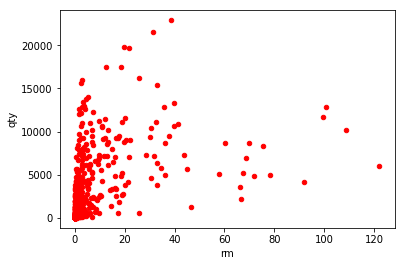

In [4]:
t.std_date = t.std_date.astype(int)
t.rhm = t.rm.astype(float)
t.qty = t.qty.astype(float)
t.plot(kind='scatter', x='rm', y='qty', color='r')

## Scaling 및 MATRIX 화

In [5]:
t= t.set_index('std_date')
t_point = t.values
t_point = scale(t.values)

## KMeans

In [6]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Cluster n = 3
seed = 7
num = 4
km = KMeans(n_clusters=num, random_state=seed).fit(t_point)

km.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [7]:
val = t
val['label'] = km.labels_
# val['label'] = db.labels_
chart = val.reset_index().iloc[:, 1:]

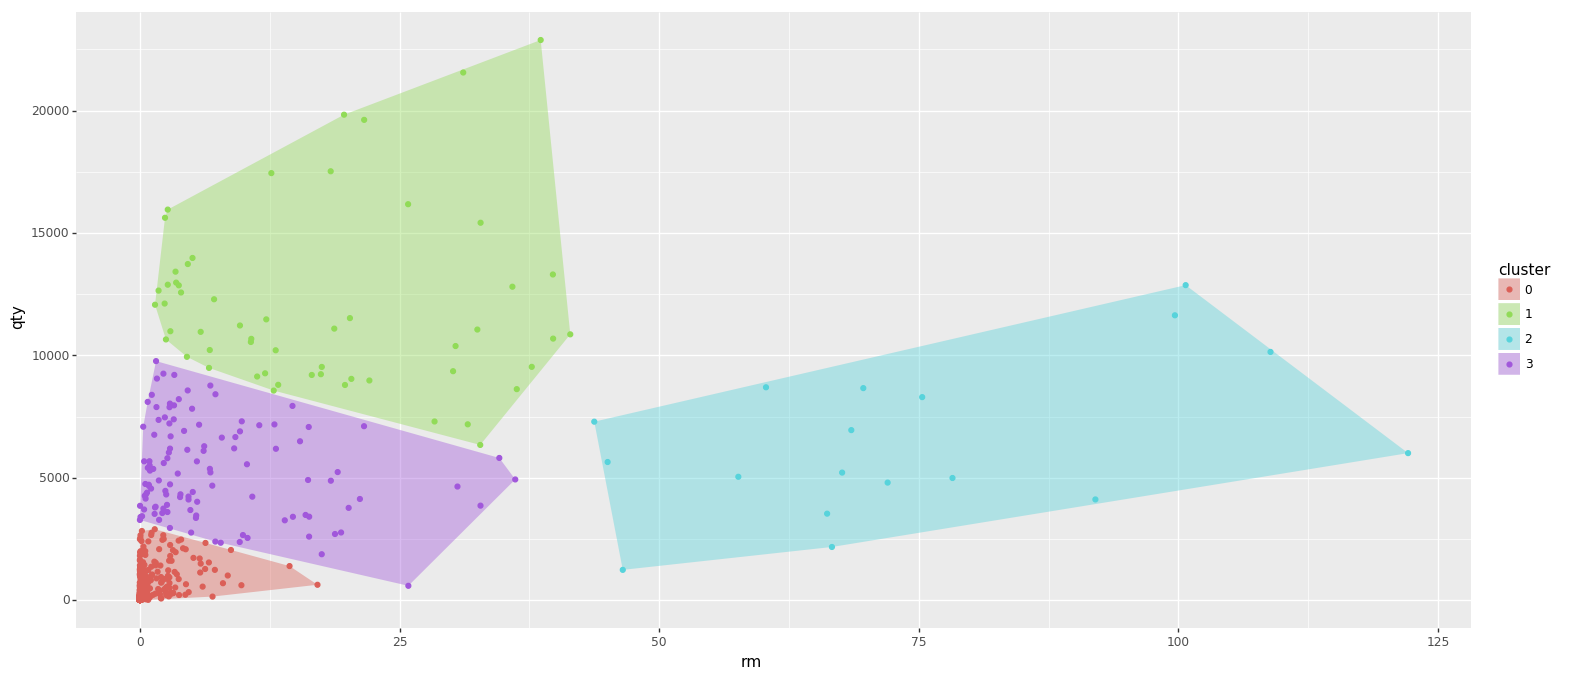

<ggplot: (47111722188)>

In [8]:
# Apple Background
# %config InlineBackend.figure_format = 'retina'
# Scatter plot
(ggplot(val, aes('rm', 'qty', color='label')) +
 geom_point() +
 ggtitle('t-SNE result : iris dataset') +
 theme(figure_size=(12, 6))
)

# 경계 값 맞추기
def group_chull(df):
    ch = ConvexHull(df.loc[:, ['rm', 'qty']].values)
    return df.iloc[ch.vertices, :]

df_chull_result = (chart
 .groupby('label', as_index=False, group_keys=False)
 .apply(group_chull)
 .reset_index(drop=True)
 .loc[:, ['rm', 'qty', 'label']]
)

# Shade
(df_chull_result.assign(cluster = lambda d: d['label'].astype('str'))
.pipe(ggplot, aes(x='rm', y='qty')) +
 geom_polygon(aes(fill='cluster'), alpha=0.4) +
 geom_point(data=val.assign(cluster = lambda d: d['label'].astype('str')),
            mapping=aes(color='cluster')) + theme(figure_size=(18,8))
)

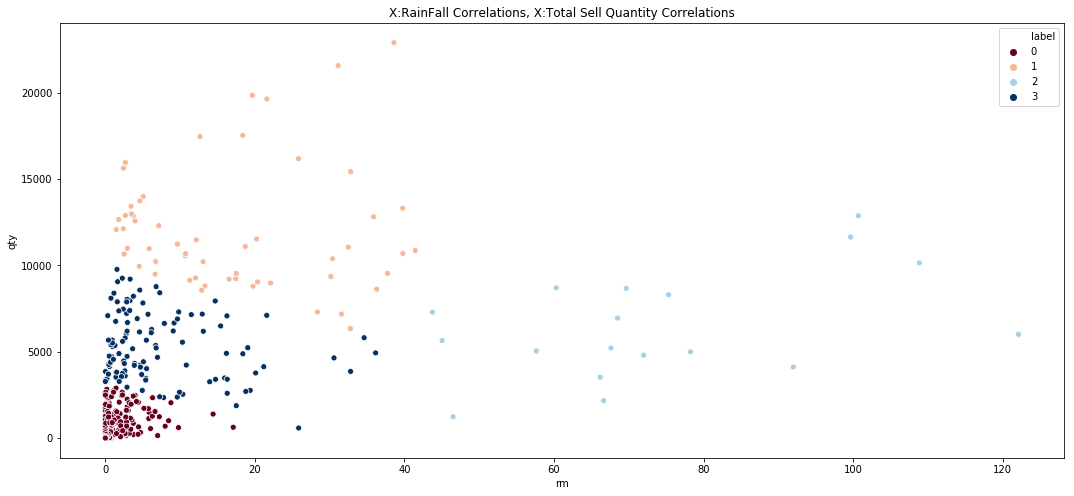

In [33]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.title('X:RainFall, X:Total Sell Quantity Correlations')
sns.scatterplot(data = val, x='rm', y='qty', hue='label', palette='RdBu')

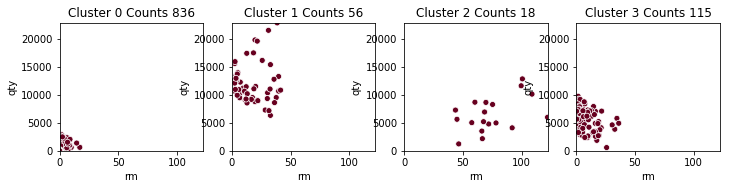

In [11]:
for i in range(len(val.label.unique())) :
    plt.subplot(3, 6, i+1)
    plt.ylim(min(val.qty), max(val.qty))
    plt.xlim(min(val.rm), max(val.rm))
    df = val[val['label'] == i]
    plt.title("Cluster %i Counts %i" % (i, len(df)))
    sns.scatterplot(data = df, x='rm', y='qty', hue='label', palette='RdBu', legend=False)

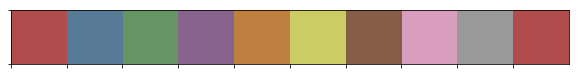

In [12]:
sns.palplot(sns.color_palette("Set1", n_colors=10, desat=.5))

## Elbow

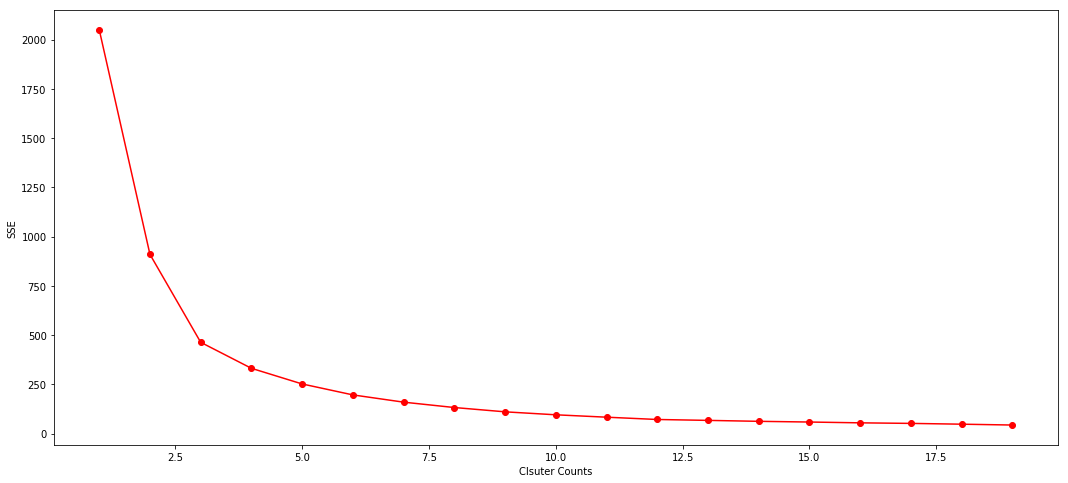

In [14]:
# 20개 비교
def elbow(X):
    sse = []
    for i in range(1, 20):
        km_elbow = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km_elbow.fit(X)
        sse.append(km_elbow.inertia_)
    plt.plot(range(1, 20), sse, marker='o', color='r')
    plt.xlabel('Clsuter Counts')
    plt.ylabel('SSE')
    plt.show()
elbow(t_point)

# 실루엣(Silhouette)

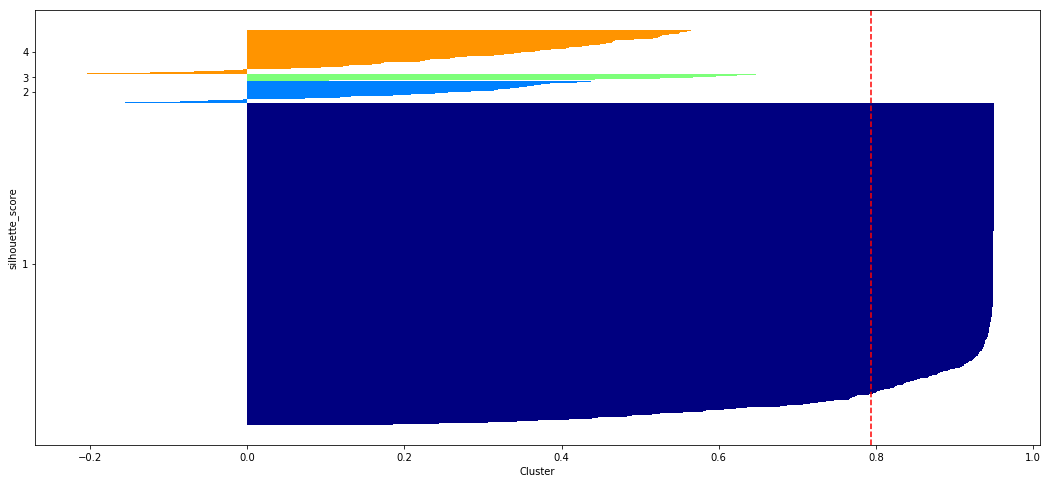

In [15]:
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(X, y_km) :
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels) :
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
    
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.xlabel('Cluster')
    plt.ylabel('silhouette_score')
    
    plt.show()
    
    # Function End 

X, y= t_point, km.labels_
km = KMeans(n_clusters=num, random_state=7)
y_km = km.fit_predict(X)
plotSilhouette(X, y_km)


In [ ]:
t.to_csv('/Users/HIT/Desktop/Cluster_rm.csv')

In [17]:
table_name = 'cluster_umb'
# com.to_sql(table_name, con, if_exists='replace', schema='contest')
t.to_sql(table_name, con, if_exists='replace', schema='contest')

# 클러스터링 데이터 확인

In [23]:
pgsql_cls = """  select t1.tm
       , t1.avg_temp
       , t1.sum_rm
       , coalesce(label, 0) as labels
    from (  
		  select to_date(cast(tm as varchar), 'yyyymmdd') as tm
		       ,  avg(avg_temp) as avg_temp  -- 일자별 지역 평균 온도
		       ,  avg(sum_rm) as sum_rm      -- 일자별 평균 강수량
		    from contest.sales_data
		  group by to_date(cast(tm as varchar), 'yyyymmdd')
		  ) t1 
   left outer join (
			select to_date(cast(std_date as varchar), 'yyyymmdd') as tm
			     , label
			  from contest.cluster_umb
			   ) t2 
		   on t2.tm = t1.tm
"""
cur.execute(pgsql_cls)
cls = cur.fetchall()

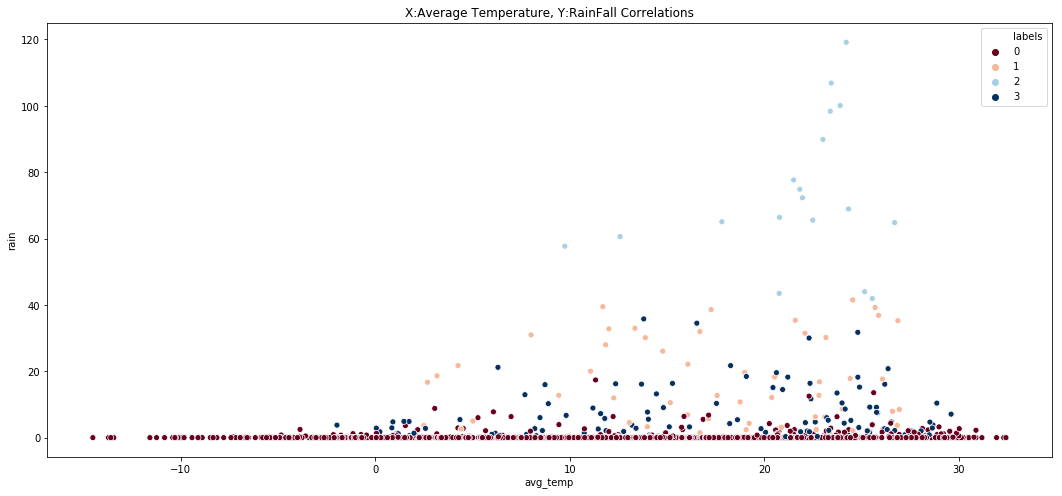

In [32]:
val_cls = pd.DataFrame(cls)
cols = ['std_date', 'avg_temp', 'rain', 'labels']
val_cls.columns = cols
val_cls.labels = val_cls.labels.astype(int)
val_cls.avg_temp = val_cls.avg_temp.astype(float)
val_cls.rain = val_cls.rain.astype(float)
plt.title('X:Average Temperature, Y:RainFall Correlations')
sns.scatterplot(data=val_cls, x='avg_temp', y='rain', hue='labels', palette='RdBu')

# Clustering - 마스크(PM10)

In [91]:
sql2 =  """
select tm
     , sum(qty) as qty
     , avg(pm10) as pm10
  from contest.sales_data
  where cat= '마스크'
group by tm
order by 1"""
cur.execute(sql2)
result = cur.fetchall()

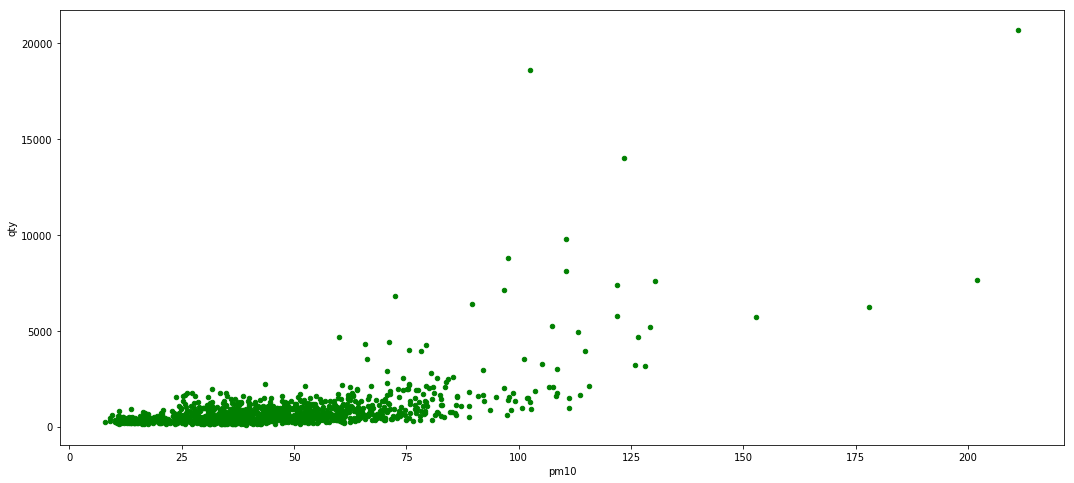

In [92]:
mask = pd.DataFrame(result)
col = ['std_date', 'qty', 'pm10']
mask.columns = col
mask.std_date = mask.std_date.astype(int)
mask.pm10 = mask.pm10.astype(float)
mask.qty = mask.qty.astype(float)
mask.plot(kind='scatter', x='pm10', y='qty', color='g')

## index 설정 및 MATRIX

In [93]:
mask = mask.set_index('std_date')
mask_point = mask.values
mask_point = scale(mask.values)

## Elbow

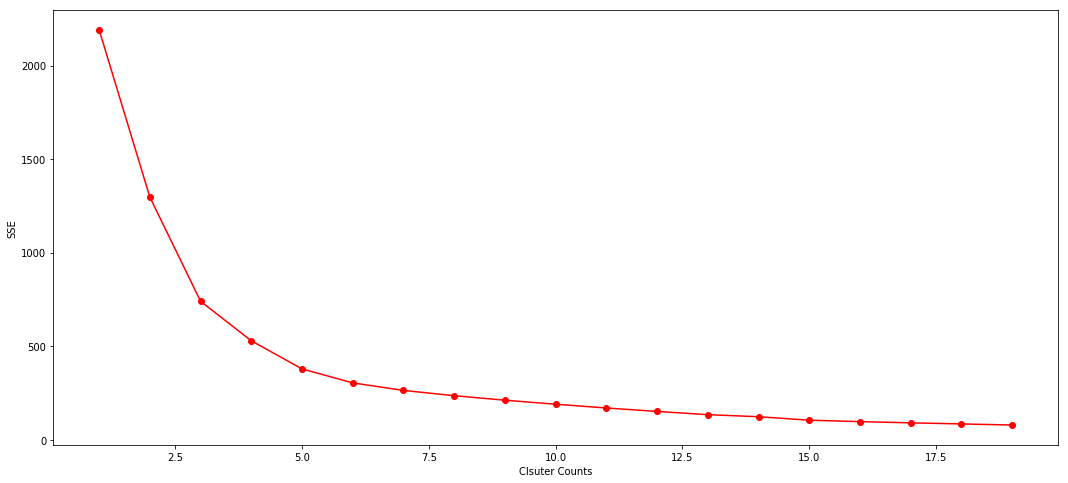

In [94]:
# 20개 비교
def elbow(X):
    sse = []
    for i in range(1, 20):
        km_elbow = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km_elbow.fit(X)
        sse.append(km_elbow.inertia_)
    plt.plot(range(1, 20), sse, marker='o', color='r')
    plt.xlabel('Clsuter Counts')
    plt.ylabel('SSE')
    plt.show()
elbow(mask_point)

## Kmeans

In [95]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Cluster n = 3
seed = 7
num = 2
km = KMeans(n_clusters=num, random_state=seed).fit(mask_point)

km.labels_

# db = DBSCAN().fit(mask_point)
# db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
val = mask
val['label'] = km.labels_
# val['label'] = db.labels_
# val['label'] = db.labels_
chart = val.reset_index().iloc[:, 1:]

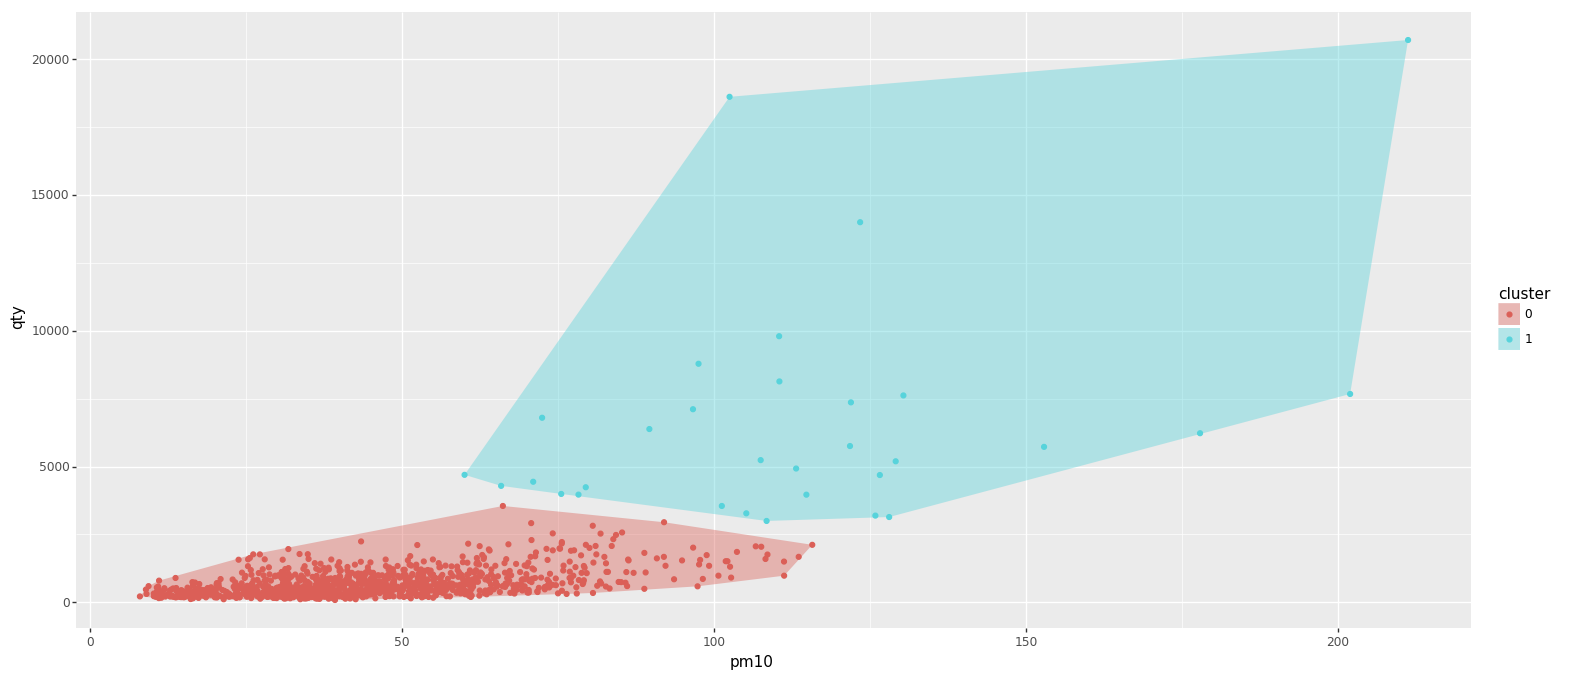

<ggplot: (47124544334)>

In [97]:
# Apple Background
# %config InlineBackend.figure_format = 'retina'
# Scatter plot
(ggplot(val, aes('pm10', 'qty', color='label')) +
 geom_point() +
 ggtitle('t-SNE result : iris dataset') +
 theme(figure_size=(12, 6))
)

# 경계 값 맞추기
def group_chull(df):
    ch = ConvexHull(df.loc[:, ['pm10', 'qty']].values)
    return df.iloc[ch.vertices, :]

df_chull_result = (chart
 .groupby('label', as_index=False, group_keys=False)
 .apply(group_chull)
 .reset_index(drop=True)
 .loc[:, ['pm10', 'qty', 'label']]
)

# Shade
(df_chull_result.assign(cluster = lambda d: d['label'].astype('str'))
.pipe(ggplot, aes(x='pm10', y='qty')) +
 geom_polygon(aes(fill='cluster'), alpha=0.4) +
 geom_point(data=val.assign(cluster = lambda d: d['label'].astype('str')),
            mapping=aes(color='cluster')) + theme(figure_size=(18,8))
)

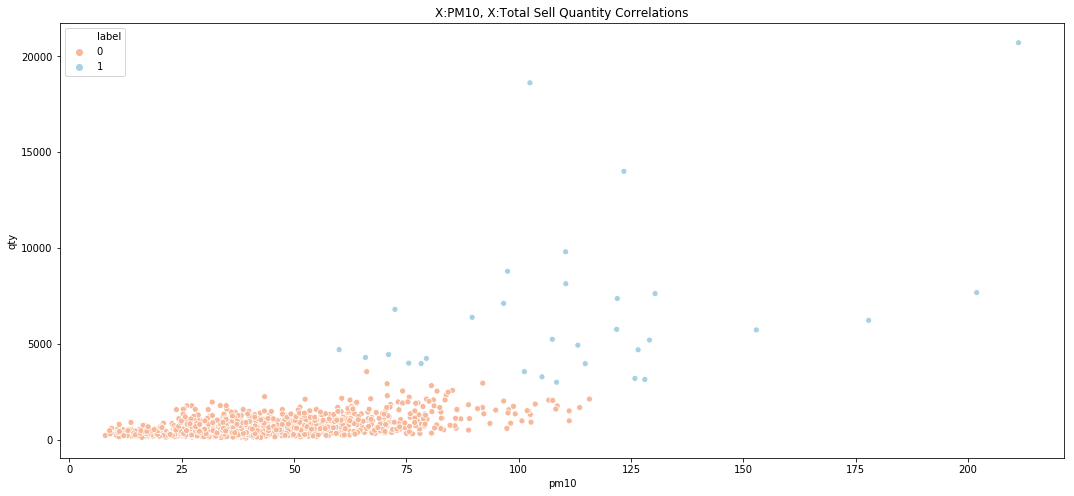

In [98]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.title('X:PM10, X:Total Sell Quantity Correlations')
sns.scatterplot(data = val, x='pm10', y='qty', hue='label', palette='RdBu')

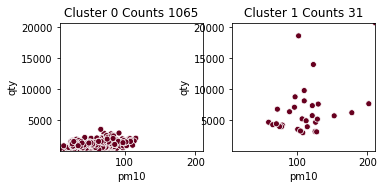

In [99]:
for i in range(len(val.label.unique())) :
    plt.subplot(3, 6, i+1)
    plt.ylim(min(val.qty), max(val.qty))
    plt.xlim(min(val.pm10), max(val.pm10))
    df = val[val['label'] == i]
    plt.title("Cluster %i Counts %i" % (i, len(df)))
    sns.scatterplot(data = df, x='pm10', y='qty', hue='label', palette='RdBu', legend=False)

## 실루엣(Silhouette) - Pm10, 마스크

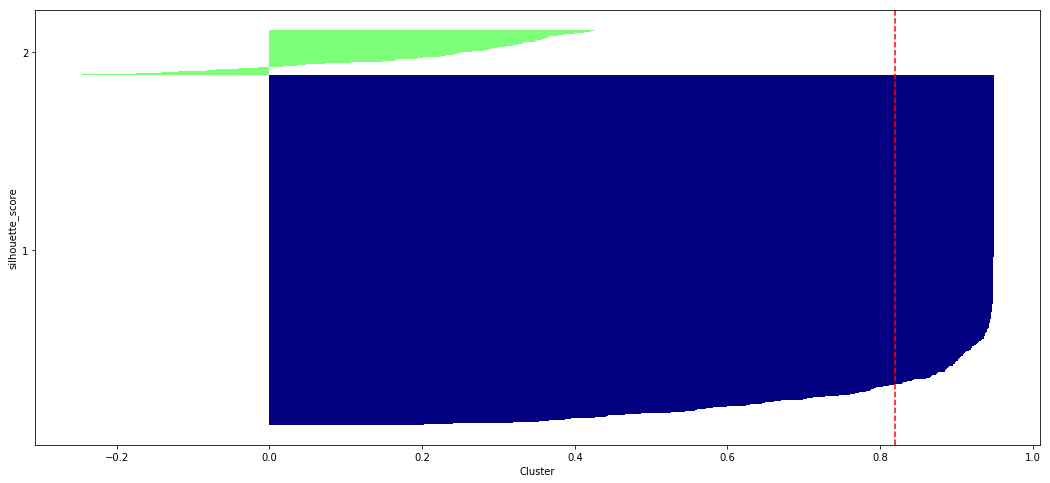

In [100]:
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(X, y_km) :
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels) :
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
    
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.xlabel('Cluster')
    plt.ylabel('silhouette_score')
    
    plt.show()
    
    # Function End 

X, y= t_point, km.labels_
km = KMeans(n_clusters=num, random_state=7)
y_km = km.fit_predict(X)
plotSilhouette(X, y_km)


In [104]:
table_name = 'cluster_mask'
# com.to_sql(table_name, con, if_exists='replace', schema='contest')
val.to_sql(table_name, con, if_exists='replace', schema='contest')

In [103]:
val.label.unique()

array([0, 1], dtype=int64)

# 24절기 정보

24절기 정보는 단순한 시계열 정보이므로 기각

In [105]:
pg_cal = """
      select substring(cast(tm as varchar),1,6) as std_date
           , substring(cast(tm as varchar),1,4) as yyyy
           , substring(cast(tm as varchar),5,2) as mm
        from contest.sales_data
      group by substring(cast(tm as varchar),1,6)
             , substring(cast(tm as varchar),1,4)
             , substring(cast(tm as varchar),5,2)

"""
cur.execute(pg_cal)
yyyymm = cur.fetchall()
julgi = pd.DataFrame(yyyymm)
julgi.columns = ['std_yyyymm', 'yyyy', 'mm']

In [118]:
# 변수
dateName, str_date, sunLongitude = [], [], []

In [120]:
default_url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/get24DivisionsInfo?'
serviceKey = 'ServiceKey=4SJGiPhNgWI9UwnoEXda4qByveJq%2BLMp95z3ENAlz3AFUpqAfJw4DBww7DWrnTS7T%2BCJKG0yN0Of8gIWRCkSDg%3D%3D'

for calendar in range(len(julgi)) :
    # 24절기 정보
    year = 'solYear=' + julgi['yyyy'][calendar] + '&'
    month = 'solMonth=' + julgi['mm'][calendar] + '&'
    path = default_url + year + month + serviceKey
    response = requests.get(path)
    doc = response.text
    
    tree = elemTree.fromstring(doc)
    
    for i in range(len(tree.find('./body').find('items'))) :
        dateName.append(tree.find('./body/items')[i].find('dateName').text)
        str_date.append(tree.find('./body/items')[i].find('locdate').text)
        sunLongitude.append(tree.find('./body/items')[i].find('sunLongitude').text)

In [142]:
# DataFrame
julgi_outcom  = pd.DataFrame({'date_name' : dateName, 'str_date' : str_date,'sun_longitude' : sunLongitude})
julgi_outcom.head()

,date_name,str_date,sun_longitude
0,소한,20160106,285
1,대한,20160121,300
2,입춘,20160204,315
3,우수,20160219,330
4,경칩,20160305,345


In [ ]:
table_name = 'julgi'
julgi_outcom.to_sql(table_name, con, if_exists='replace', schema='contest')

In [143]:
df = julgi_outcom
for i in range(len(julgi_outcom.columns)) :
    # 초기값
    if i == 0 :
        df['dummy'] = julgi_outcom[julgi_outcom.columns[0]]
    else :
        df['dummy'] = julgi_outcom['dummy'] + 'x' + julgi_outcom[julgi_outcom.columns[i]]
# julgi_outcom['date_name'] + 'x' + julgi_outcom['str_da?te']

df.head()

,date_name,str_date,sun_longitude,dummy
0,소한,20160106,285,소한x20160106x285
1,대한,20160121,300,대한x20160121x300
2,입춘,20160204,315,입춘x20160204x315
3,우수,20160219,330,우수x20160219x330
4,경칩,20160305,345,경칩x20160305x345


In [145]:
pd.get_dummies(df['dummy'])

,경칩x20160305x345,경칩x20170305x345,경칩x20180306x345,곡우x20160420x30,곡우x20170420x30,곡우x20180420x30,대서x20160722x120,대서x20170723x120,대서x20180723x120,대설x20161207x255,...,추분x20180923x180,춘분x20160320x0,춘분x20170320x0,춘분x20180321x0,하지x20160621x90,하지x20170621x90,하지x20180621x90,한로x20161008x195,한로x20171008x195,한로x20181008x195
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
area = pd.read_csv('/Users/HIT/Downloads/area.csv', encoding='utf-8')
print(area.shape)
area.head()

(61, 8)


,지역명,lalavla,상업용지,주거,준공업,일반상업,지하철,중심상업
0,경기도 안산시,1,0,0,0,0,0,1
1,경기도 부천시,4,1,0,0,3,0,0
2,인천광역시 서구,1,0,1,0,0,0,0
3,인천광역시 강화군,0,0,0,0,0,0,0
4,서울특별시 종로구,1,0,0,0,1,0,0


In [149]:
table_name = 'area_store'
area.to_sql(table_name, con, if_exists='replace', schema='contest')

In [153]:
61 * 2 * 4

488

In [154]:
2 * 4 * 7

56